
|       | Ile 1 | Ile 2 | Ile 3 | Ile 4 |
|-------|-------|-------|-------|-------|
| **Ile 1** | 0     | 0.3   | 0.3   | 0.4   |
| **Ile 2** | 0.3   | 0     | 0.4   | 0.3   |
| **Ile 3** | 0.3   | 0.4   | 0     | 0.3   |
| **Ile 4** | 0.4   | 0.3   | 0.3   | 0     |

In [2]:
# diviser la poputions en sous populations (5 pour les 5 opérateurs de mutation => 1 opérateur par ile)
# migrations d'une ile a l'autre géré par des probabilités
# matrice de transition pour stocker les probabilités de migration
# graphe de transition des iles complet (chaque ile est reliée à toutes les autres)
# a chaque migration, on récupère le feedback de la fitness de l'individu migré et on met à jour la matrice de transition
# 𝑀(𝑡+1) = 𝑓(𝑀 𝑡 ) => f est une fonction de mise à jour de la matrice de transition
# probleme de oneMax
# operteur de mutation : 1flip, 3flip, 5flip, BitFlip
# variables du problème :
# • Ensemble d’iles 𝐼 = {𝑖1,…, 𝑖𝑛}
# • Ensemble d’opérateurs/algos A = {𝑎1,…, 𝑎𝑛}, 𝑎𝑘 
# affecté à 𝑖𝑘
# • Ensemble de populations P = {𝑝1,…, 𝑝𝑛}
# • Topologie 𝐼, 𝑉 (ici graphe complet)
# • Matrice de migration 𝑀 de taille 𝑛 × 𝑛, 𝑀 𝑖, 𝑗 ∈ 0,1
# • Politique de migration Π: 𝐼 × 𝑀 → 𝐼

# fonction f de learing de la matrice de transition
# 𝑀(𝑡+1) = 1 − 𝛽 𝛼𝑀 𝑡 𝑖, 𝑘 + 1 − 𝛼 𝑅 t k + 𝛽𝑁 𝑡 (𝑘)
# 𝛽𝑁 𝑡 (𝑘) bruit de migration (permet la diversification)
# 1 − 𝛼 𝑅 t k  R => récompense de la migration alpha est le taux d'apprentissage
# 𝛼𝑀 𝑡 𝑖, 𝑘 + 1 − 𝛼 𝑅 t k meme stratégie de mis a jour que pour les Q-Learning
# 𝛼𝑀 𝑡 𝑖, 𝑘 + 1 − 𝛼 𝑅 t k  partie réenforcement
# # fonction de récompense :
# 𝐸𝑙𝑖𝑡𝑖𝑠𝑡 𝑅𝑖
# 𝑡 𝑘 =
# 1 / |𝐵| 𝑖𝑓 𝑘 ∈ 𝐵𝑒𝑠𝑡 sinon
# 0

# pseudo code de l'algorithme
# Initialize population;
# repeat
# foreach population do
# foreach individual do
# One local search iteration;
# Update the Transition Matrix T;
# Migration Process;
# until stop condition;
# Algorithm : Generic Dynamic Island Model (DIM)

# he crucial point concerns the update of the transition
# matrix T , which follows a learning process:
# Tt = (1 − β)(α.Tt−1 + (1 − α).Rt) + β.Nt

# For an easier representation, we identify each island
# by an ordinal; for example, ({1, . . . , N }, {1, . . . , N }2)
# represents the topology of a N -islands model.
# Migration policies are given by a transition (stochas-
# tic) matrix T of size n, where T (i, j) represents the
# probability for an individual to migrate from island i to
# island j (or to stay at the same island if i = j). Since
# the model is dynamic, T can be updated before of after
# each migration process. One can denote Tt the matrix
# at time (or generation) t

# reward function
# Rt(i, j) =
# {
# 1/|B| if j ∈ B,
# 0 otherwise,
# with B = argmax
# j′
# ∑
# x∈Mij′t acc(x)
# |Mij′t|

# la reward se caclul sur l'ameliortion de la fitness de l'individu migré. on calcul l'amelioration moyenne pour chaque ile ou on a envoyé des individu.
# on partage la reward entre les iles qui ont reçu des individus qui ont amélioré la meilleur amelioraiton moyenne.
# B : meilleur ile => | B | nombre des meilleurs ile, ils devront partager la reward


=== Run 1/20 ===
=== Run 2/20 ===
=== Run 3/20 ===
=== Run 4/20 ===
=== Run 5/20 ===
=== Run 6/20 ===
=== Run 7/20 ===
=== Run 8/20 ===
=== Run 9/20 ===
=== Run 10/20 ===
=== Run 11/20 ===
=== Run 12/20 ===
=== Run 13/20 ===
=== Run 14/20 ===
=== Run 15/20 ===
=== Run 16/20 ===
=== Run 17/20 ===
=== Run 18/20 ===
=== Run 19/20 ===
=== Run 20/20 ===


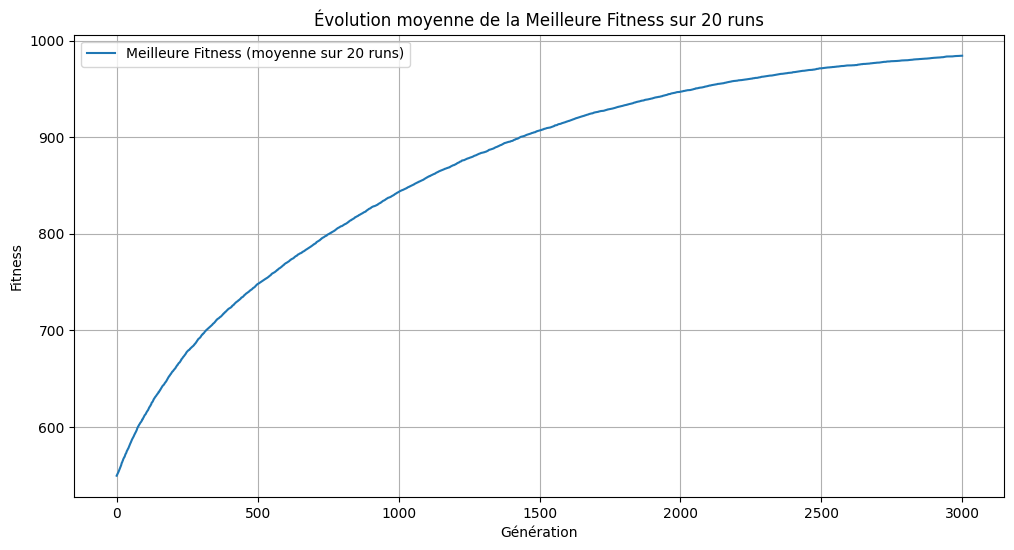

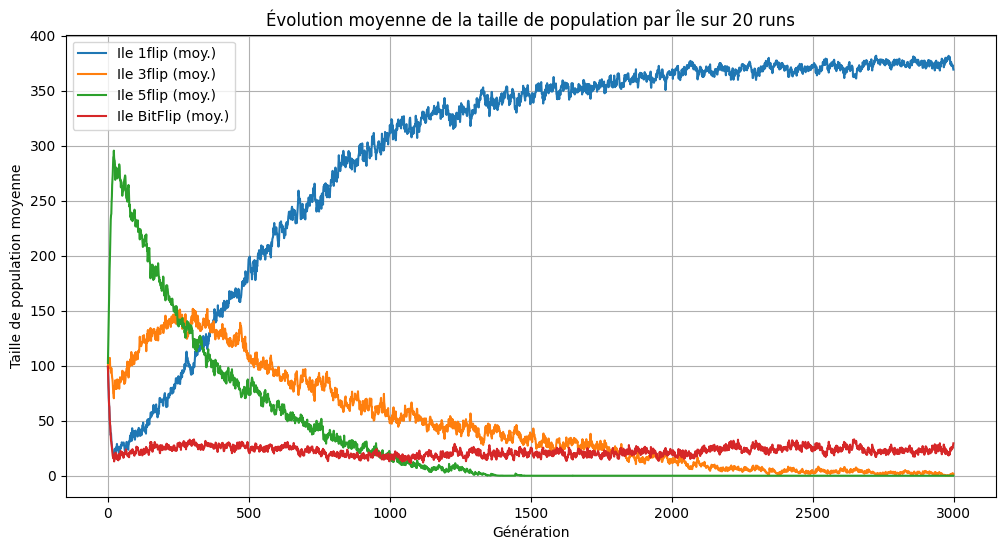

In [3]:
import random
import matplotlib.pyplot as plt
from collections import defaultdict

# Définition des constantes globales
TAILLE_VECTEUR = 1000
TAILLE_POPULATION = 100
MAX_ITER = 3000
N = 4  # Nombre d'îles
NB_RUNS = 20  # On répète l'expérience 20 fois

# ------------------------------------------------------------
# Opérateurs de mutation
# ------------------------------------------------------------
def mutation1flip(bits):
    """Mutation qui inverse un seul bit aléatoire."""
    child = bits[:]
    idx = random.randint(0, TAILLE_VECTEUR - 1)
    child[idx] = 1 - child[idx]
    return child

def mutation3flip(bits):
    """Mutation qui inverse trois bits aléatoires distincts."""
    child = bits[:]
    indices = random.sample(range(TAILLE_VECTEUR), 3)
    for idx in indices:
        child[idx] = 1 - child[idx]
    return child

def mutation5flip(bits):
    """Mutation qui inverse cinq bits aléatoires distincts."""
    child = bits[:]
    indices = random.sample(range(TAILLE_VECTEUR), 5)
    for idx in indices:
        child[idx] = 1 - child[idx]
    return child

def mutationBitFlip(bits):
    """Mutation qui inverse chaque bit avec une probabilité de 1/TAILLE_VECTEUR."""
    child = bits[:]
    for i in range(TAILLE_VECTEUR):
        if random.random() < 1 / TAILLE_VECTEUR:
            child[i] = 1 - child[i]
    return child

# ------------------------------------------------------------
# Classes de base
# ------------------------------------------------------------
class Individu:
    def __init__(self):
        # Initialisation aléatoire des bits
        self.bits = [random.randint(0, 1) for _ in range(TAILLE_VECTEUR)]
        self.origin = None
        self.currentIsland = None
        self.upgrade = 0
        self.migrated = False

    def getFitness(self):
        return sum(self.bits)

class Island:
    def __init__(self, id_island, operator, name):
        self.id = id_island
        self.population = [Individu() for _ in range(TAILLE_POPULATION)]
        self.operator = operator  # fonction de mutation
        self.name = name
        
    def getBestElement(self):
        if not self.population:
            return None
        return max(self.population, key=lambda x: x.getFitness())
    
    def getBestFitness(self):
        best = self.getBestElement()
        if best:
            return best.getFitness()
        return 0
    
    def local_search(self):
        """
        Local Search simple : on applique la mutation sur chaque individu.
        Si l'enfant est meilleur, on remplace le parent.
        On met à jour l'upgrade de chaque individu.
        """
        for ind in self.population:
            fitness_before = ind.getFitness()
            child_bits = self.operator(ind.bits)
            child_fitness = sum(child_bits)
            if child_fitness > fitness_before:
                ind.bits = child_bits
            ind.upgrade = ind.getFitness() - fitness_before

class Archipelo:
    def __init__(self):
        self.islands = [
            Island(0, mutation1flip, "Ile 1flip"),
            Island(1, mutation3flip, "Ile 3flip"),
            Island(2, mutation5flip, "Ile 5flip"),
            Island(3, mutationBitFlip, "Ile BitFlip")
        ]
        # Matrice de migration : initialisée uniformément
        self.migrationMatrix = [[1.0/N for _ in range(N)] for _ in range(N)]
        # Matrice de récompense : mise à jour après chaque génération
        self.rewardMatrix = [[0.0 for _ in range(N)] for _ in range(N)]
        
        self.bestFitness = 0
        self.bestIndividual = None

        # Paramètres d'apprentissage / bruit
        self.alpha = 0.9
        self.beta = 0.001
        self.noise = 0.001

    def getBestElement(self):
        best_elements = []
        for island in self.islands:
            best = island.getBestElement()
            if best is not None:
                best_elements.append(best)
        if not best_elements:
            return None
        return max(best_elements, key=lambda x: x.getFitness())
    
    def getBestFitness(self):
        best_element = self.getBestElement()
        if best_element:
            return best_element.getFitness()
        return 0
    
    def run_one_generation(self):
        """
        1) Migration
        2) Local search
        3) MàJ bestFitness
        4) Calcul Reward
        5) MàJ matrice de migration
        """
        # 1) MIGRATION
        for source_island in self.islands:
            probabilities = self.migrationMatrix[source_island.id]
            for ind in source_island.population[:]:  # copie pour itération
                if not ind.migrated:
                    rand = random.random()
                    destination = None
                    cumulative_prob = 0.0
                    for i, proba in enumerate(probabilities):
                        cumulative_prob += proba
                        if rand < cumulative_prob:
                            destination = i
                            break
                    if destination is None:
                        destination = random.randrange(N)
                    
                    ind.origin = source_island.id
                    ind.currentIsland = destination
                    ind.migrated = True
                    
                    source_island.population.remove(ind)
                    self.islands[destination].population.append(ind)

        # On réinitialise le flag migrated
        for island in self.islands:
            for ind in island.population:
                ind.migrated = False

        # 2) LOCAL SEARCH
        for island in self.islands:
            island.local_search()

        # 3) MàJ bestFitness
        current_best = self.getBestFitness()
        if current_best > self.bestFitness:
            self.bestFitness = current_best
            self.bestIndividual = self.getBestElement()

        # 4) Calcul Reward
        num_islands = len(self.islands)
        self.rewardMatrix = [[0.0 for _ in range(num_islands)] for _ in range(num_islands)]
        
        migrants_by_origin_dest = defaultdict(list)
        for island in self.islands:
            for ind in island.population:
                if ind.origin is not None:
                    migrants_by_origin_dest[(ind.origin, ind.currentIsland)].append(ind)
        
        for i_source in range(num_islands):
            dest_improvements = {}
            for i_dest in range(num_islands):
                key = (i_source, i_dest)
                if key in migrants_by_origin_dest:
                    inds = migrants_by_origin_dest[key]
                    if inds:
                        mean_up = sum(i.upgrade for i in inds) / len(inds)
                        dest_improvements[i_dest] = mean_up
                    else:
                        dest_improvements[i_dest] = 0.0
                else:
                    dest_improvements[i_dest] = 0.0
            
            best_value = max(dest_improvements.values())
            best_destinations = [d for d, v in dest_improvements.items() if v == best_value and best_value > 0]
            if best_value > 0:
                reward_per_best = 1.0 / len(best_destinations)
                for bd in best_destinations:
                    self.rewardMatrix[i_source][bd] = reward_per_best
        
        # 5) MàJ matrice de migration
        for i in range(num_islands):
            for j in range(num_islands):
                old_ij = self.migrationMatrix[i][j]
                r_ij = self.rewardMatrix[i][j]
                
                new_ij = (1 - self.beta) * (self.alpha * old_ij + (1 - self.alpha) * r_ij) \
                         + self.beta * self.noise
                self.migrationMatrix[i][j] = new_ij
        
        # Normalisation
        for i in range(num_islands):
            row_sum = sum(self.migrationMatrix[i])
            if row_sum > 0:
                for j in range(num_islands):
                    self.migrationMatrix[i][j] /= row_sum
            else:
                # Ligne anormale, on répartit uniformément
                for j in range(num_islands):
                    self.migrationMatrix[i][j] = 1.0 / num_islands

def run_experiment():
    """
    Lance UNE exécution complète (jusqu'à MAX_ITER ou jusqu'à la solution).
    Retourne :
      - best_fitness_history : liste des meilleures fitness par génération (longueur MAX_ITER)
      - population_history : {nom_ile: [taille_pop_à_chaque_génération]}
    """
    archipelo = Archipelo()
    
    # Initialisation manuelle : origin et currentIsland
    for island in archipelo.islands:
        for ind in island.population:
            ind.currentIsland = island.id
            ind.origin = island.id
    
    # Pour le suivi
    population_history = {island.name: [] for island in archipelo.islands}
    best_fitness_history = []

    for generation in range(MAX_ITER):
        archipelo.run_one_generation()
        
        # Sauvegarder la best_fitness
        best_fitness_history.append(archipelo.bestFitness)
        
        # Sauvegarder la taille des populations
        for island in archipelo.islands:
            population_history[island.name].append(len(island.population))
        
        # Arrêt si OneMax optimum atteint
        if archipelo.bestFitness == TAILLE_VECTEUR:
            # on complète le reste des itérations (jusqu'à MAX_ITER-1)
            # par la même valeur, pour garder la même longueur
            for _ in range(generation+1, MAX_ITER):
                best_fitness_history.append(archipelo.bestFitness)
                for island in archipelo.islands:
                    population_history[island.name].append(len(island.population))
            break
    
    return best_fitness_history, population_history


def main():
    # On va exécuter NB_RUNS fois l'expérience
    all_fitness_runs = []  # liste de best_fitness_history pour chaque run
    all_population_runs = []  # liste de population_history pour chaque run
    
    for run_index in range(NB_RUNS):
        print(f"=== Run {run_index+1}/{NB_RUNS} ===")
        bf_history, pop_history = run_experiment()
        all_fitness_runs.append(bf_history)
        all_population_runs.append(pop_history)
    
    # Maintenant, on agrège (moyenne) sur NB_RUNS.
    # 1) Best Fitness moyenne
    # on suppose que toutes les best_fitness_history font EXACTEMENT MAX_ITER de long
    # grâce au "remplissage" si la solution est atteinte avant la fin.
    
    avg_best_fitness = [0.0] * MAX_ITER
    for i in range(MAX_ITER):
        # Faire la moyenne sur les NB_RUNS
        s = 0.0
        for r in range(NB_RUNS):
            s += all_fitness_runs[r][i]
        avg_best_fitness[i] = s / NB_RUNS
    
    # 2) Population moyenne pour chaque île
    # on doit faire la même chose pour chaque île
    island_names = list(all_population_runs[0].keys())  # "Ile 1flip", etc.
    avg_populations = {name: [0.0]*MAX_ITER for name in island_names}
    
    for name in island_names:
        for gen in range(MAX_ITER):
            s = 0.0
            for r in range(NB_RUNS):
                s += all_population_runs[r][name][gen]
            avg_populations[name][gen] = s / NB_RUNS
    
    # 3) Tracer les courbes moyennes
    # a) Meilleure fitness moyenne
    plt.figure(figsize=(12, 6))
    plt.plot(avg_best_fitness, label="Meilleure Fitness (moyenne sur " + str(NB_RUNS) + " runs)")
    plt.xlabel('Génération')
    plt.ylabel('Fitness')
    plt.title('Évolution moyenne de la Meilleure Fitness sur ' + str(NB_RUNS) + ' runs')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # b) Taille de population moyenne
    plt.figure(figsize=(12, 6))
    for name in island_names:
        plt.plot(avg_populations[name], label=f"{name} (moy.)")
    plt.xlabel('Génération')
    plt.ylabel('Taille de population moyenne')
    plt.title('Évolution moyenne de la taille de population par Île sur ' + str(NB_RUNS) + ' runs')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
